In [1]:
#import all the libraries 

#used for complex mathematical operations
import numpy as np

#used for data analysis
import pandas as pd

#used for data visualization and graphical plotting
import matplotlib.pyplot as plt

#making statistical graphics
import seaborn as sns

#after execute code immediatly execute charts
%matplotlib inline

In [3]:
#import the data set
#used pandas library
data = pd.read_csv('heart.csv')

In [4]:
#data set preview
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#returns the first n rows of the dataset with column name
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Data Analysis

In [7]:
#information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#size of the datset
print('The shape of our features is:', data.shape)

The shape of our features is: (303, 14)


In [9]:
#pre-processing

# gets a dataset with all of the columns and the number of Null values in it
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values count"])
# adds a column with the % of the Null out of all of the column
null["Null values percentage"]=(data.isna().sum()/len(data)*100) 
# keep only the ones that has Null values
null = null[null["Null values percentage"] > 0] 
# prints it in a pretty way
null.style.background_gradient()

,Null Values count,Null values percentage


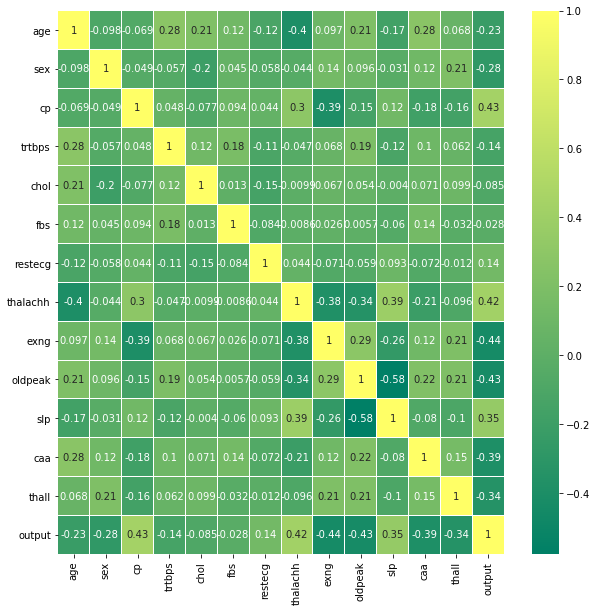

<Figure size 432x288 with 0 Axes>

In [10]:
#correlation figure 
#using seaborn library
plt.figure(figsize=(10,10))
# plot the heatmap
sns.heatmap(data.corr(),linewidth=.01,annot=True,cmap="summer")
plt.show()
#Save the current figure
plt.savefig('correlationfigure')

<AxesSubplot:xlabel='output', ylabel='count'>

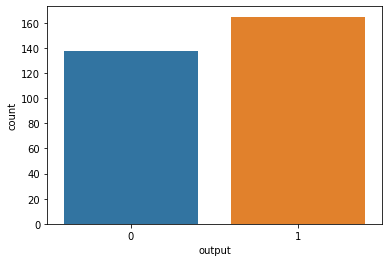

In [11]:
#Explorataty data anlysis
sns.countplot(x='output', data=data)

In [12]:
#check the unique values each single of column
data.iloc[:, 0].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [13]:
data.iloc[:, 1].unique()

array([1, 0], dtype=int64)

In [14]:
data.iloc[:, 2].unique()

array([3, 2, 1, 0], dtype=int64)

In [15]:
data.iloc[:, -1].unique()

array([1, 0], dtype=int64)

In [16]:
#Split the data set into train data and test data

In [17]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)